In [38]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


Research Question: What factors influnce how much consumers spend on ahtletic shoes?

Varibles:

Independent: Revenue_usd
Dependent: Units_Sold 


Helping Varibles: Sales/disounts, Payment Methods, Sales Channels (Online or In Store)

In [39]:
df = pd.read_csv (r"C:\Users\damia\OneDrive\Desktop\DTSC 2301 Folder\DTSC Project\global_sports_footwear_sales_2018_2026.csv")

In [40]:
df.head()
## we can see that each order is attached to an order id which could be traced back to identify the person who bought it 

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,ORD100000,2021-01-30,ASICS,Model-370,Running,Unisex,8,Black,162,15,137.70,1,137.7,Card,Retail Store,Germany,Low,4.6
1,ORD100001,2026-10-05,Reebok,Model-314,Lifestyle,Men,8,Grey,80,5,76.00,3,228.0,Card,Online,USA,Low,3.9
2,ORD100002,2023-11-12,ASICS,Model-763,Lifestyle,Men,8,Black,176,15,149.60,4,598.4,Cash,Retail Store,India,Medium,3.0
3,ORD100003,2026-08-29,Reebok,Model-905,Basketball,Women,7,White,61,15,51.85,2,103.7,Card,Retail Store,India,High,3.4
4,ORD100004,2019-11-09,Nike,Model-413,Training,Men,11,Black,80,0,80.00,4,320.0,Cash,Online,USA,Medium,3.0


In [41]:
df["order_id"].duplicated().sum()
## checking to see if there are in suplicated orders, we can see after we run it that there are no duplicates

np.int64(0)

In [180]:
df.isnull().sum()##  Check for missing values... can I delete them or does that mess up my graph

order_id                 0
order_date               0
brand                    0
model_name               0
category                 0
gender                   0
size                     0
color                    0
base_price_usd           0
discount_percent         0
final_price_usd          0
units_sold               0
revenue_usd              0
payment_method           0
sales_channel            0
country                  0
customer_income_level    0
customer_rating          0
dtype: int64

In [43]:
df.columns

Index(['order_id', 'order_date', 'brand', 'model_name', 'category', 'gender',
       'size', 'color', 'base_price_usd', 'discount_percent',
       'final_price_usd', 'units_sold', 'revenue_usd', 'payment_method',
       'sales_channel', 'country', 'customer_income_level', 'customer_rating'],
      dtype='object')

In [44]:
df.shape### checking the rows and coloums of the data 

(30000, 18)

In [45]:
df.info()## checking the data types, all seem to be congruent with what I want 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  object 
 1   order_date             30000 non-null  object 
 2   brand                  30000 non-null  object 
 3   model_name             30000 non-null  object 
 4   category               30000 non-null  object 
 5   gender                 30000 non-null  object 
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  object 
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  object 
 14  sales_channel          30000 non-null  object 
 15  co

What needs to be cleaned in my data 

data Types: 

Sales Discount: Int

Payment Method :String 

Sales Channel: String

In [46]:
## Changing sales channel to string
df['sales_channel'] = df['sales_channel'].astype(str)

In [47]:
## Changing Sales Discount to Percent 
df["discount_percent"] = df["discount_percent"].astype(float)

In [48]:
## Changing Payment Method to String 
df["payment_method"]= df["payment_method"].astype("string")

In [ ]:
## Change Income Level to Float 

In [49]:
df.info()## Checking to see if the varibles dtypes were changed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  object 
 1   order_date             30000 non-null  object 
 2   brand                  30000 non-null  object 
 3   model_name             30000 non-null  object 
 4   category               30000 non-null  object 
 5   gender                 30000 non-null  object 
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  object 
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  float64
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  string 
 14  sales_channel          30000 non-null  object 
 15  co

In [50]:
## Checking for Outliers in Final Price 

### Caluculate IQR 
# Calculate IQR
q1=np.percentile(df["final_price_usd"],25) 
q3 =np.percentile(df["final_price_usd"],75)
iqr=q3-q1

# Calculate Threshold
threshold=1.5*iqr
lb=q1-threshold
ub=q3+threshold



# Identify Outliers
outliers=df[(df["final_price_usd"]<=lb)|(df["final_price_usd"]>=ub)]

print("There are ", len(outliers), "Outliers for Final Price ")


There are  0 Outliers for Final Price 


In [51]:
## Checking for Outliers in Discount_Price 

### Caluculate IQR 
# Calculate IQR
q1=np.percentile(df["discount_percent"],25) 
q3 =np.percentile(df["discount_percent"],75)
iqr=q3-q1

# Calculate Threshold
threshold=1.5*iqr
lb=q1-threshold
ub=q3+threshold



# Identify Outliers
outliers=df[(df["discount_percent"]<=lb)|(df["discount_percent"]>=ub)]

print("There are ", len(outliers), "Outliers for Final Price ")

There are  0 Outliers for Final Price 


At this point I noticed that my data set was already cleaned previous to me getting it

<Axes: xlabel='gender', ylabel='final_price_usd'>

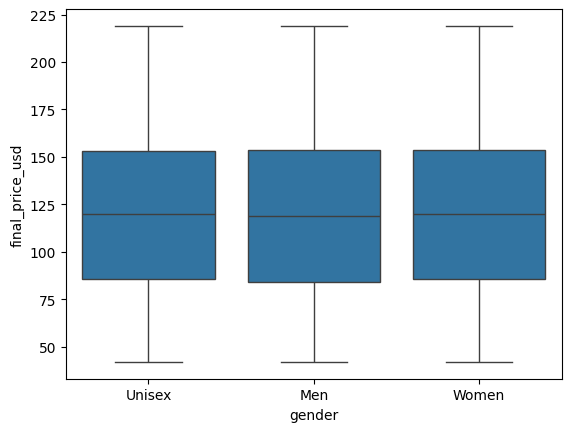

In [200]:
sns.boxplot(x="gender", y="final_price_usd", data=df)## used this graph to see the distrobution of the graph 

<Axes: xlabel='discount_percent', ylabel='units_sold'>

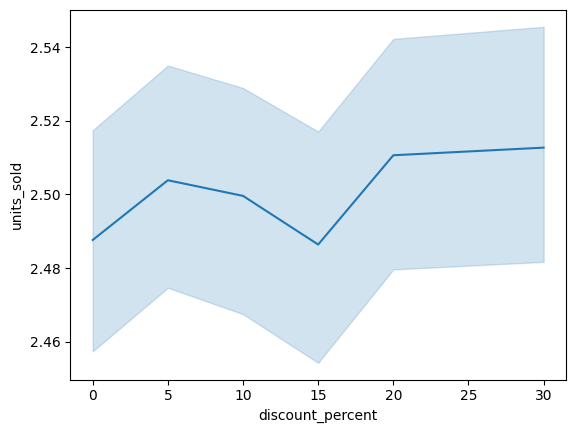

In [201]:
sns.lineplot(x="discount_percent", y="units_sold", data=df)
## Used a line plot ot see the correlation between the discount and units sold


<Axes: xlabel='customer_rating', ylabel='units_sold'>

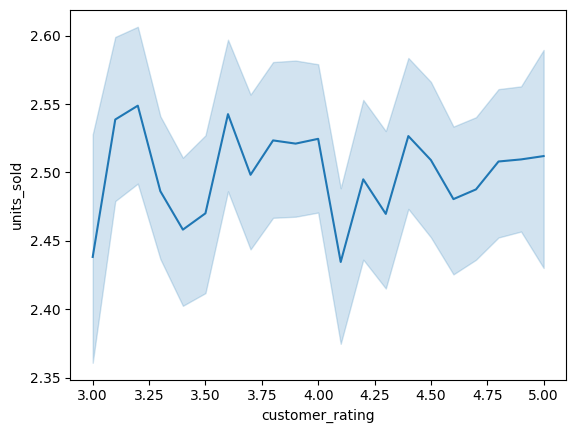

In [202]:
sns.lineplot(x="customer_rating", y="units_sold", data=df)
## Used line plot to see the correlation between soustmer rating and units sold 

<Axes: xlabel='customer_rating', ylabel='discount_percent'>

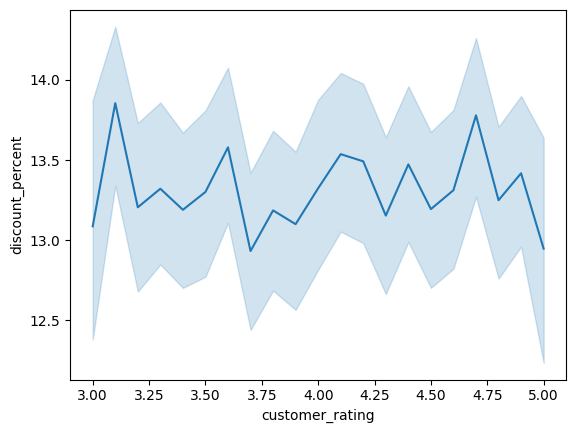

In [203]:
sns.lineplot(x="customer_rating", y="discount_percent", data=df)
## As the rating goes up the discount price goes down 

<Axes: xlabel='brand', ylabel='customer_rating'>

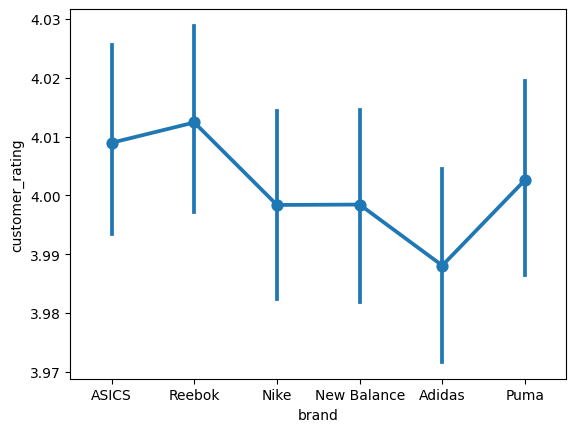

In [204]:
sns.pointplot(x="brand", y="customer_rating", data=df)
## Some brands are rated higher than other brands, which coud be a factor of what brands are bought more. 


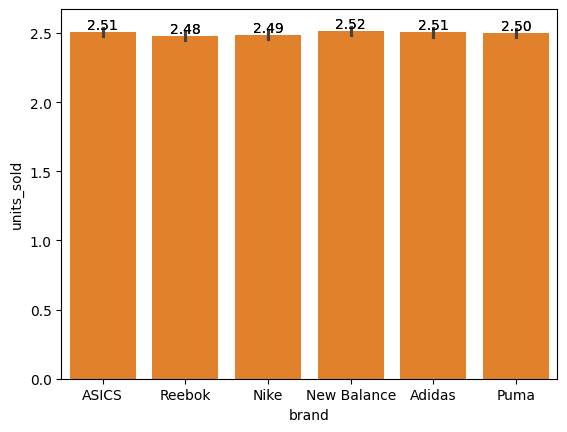

In [205]:
sns.barplot(x="brand", y="units_sold", data=df )
ax = sns.barplot(x="brand", y="units_sold", data=df, errorbar=None)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")


<Axes: xlabel='customer_income_level', ylabel='final_price_usd'>

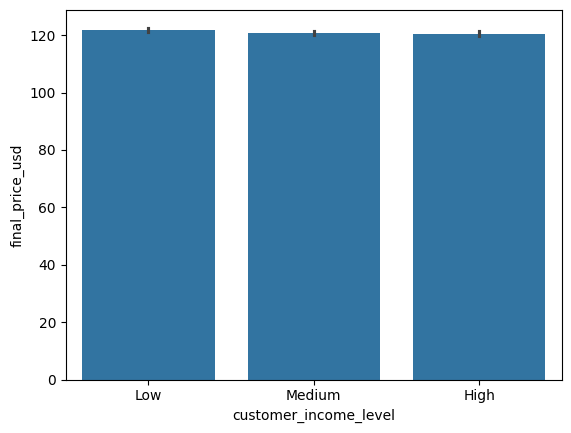

In [206]:
sns.barplot(x="customer_income_level", y="final_price_usd", data=df)

(0.0, 3.5)

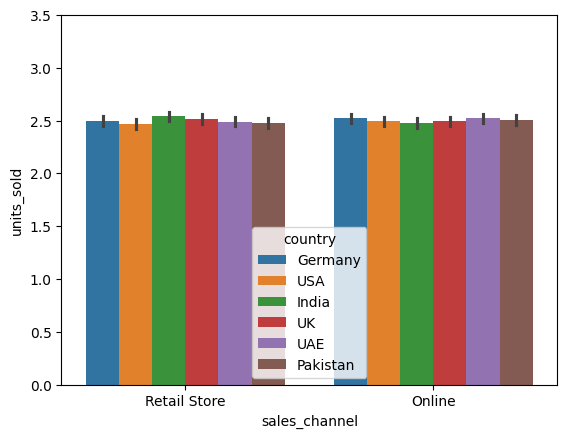

In [207]:
sns.barplot(x="sales_channel", y="units_sold", data=df,hue='country')
plt.ylim(0,3.5) 
### We see that there is no correlation between units sold and the the sales channel in certian countries it look like its all 


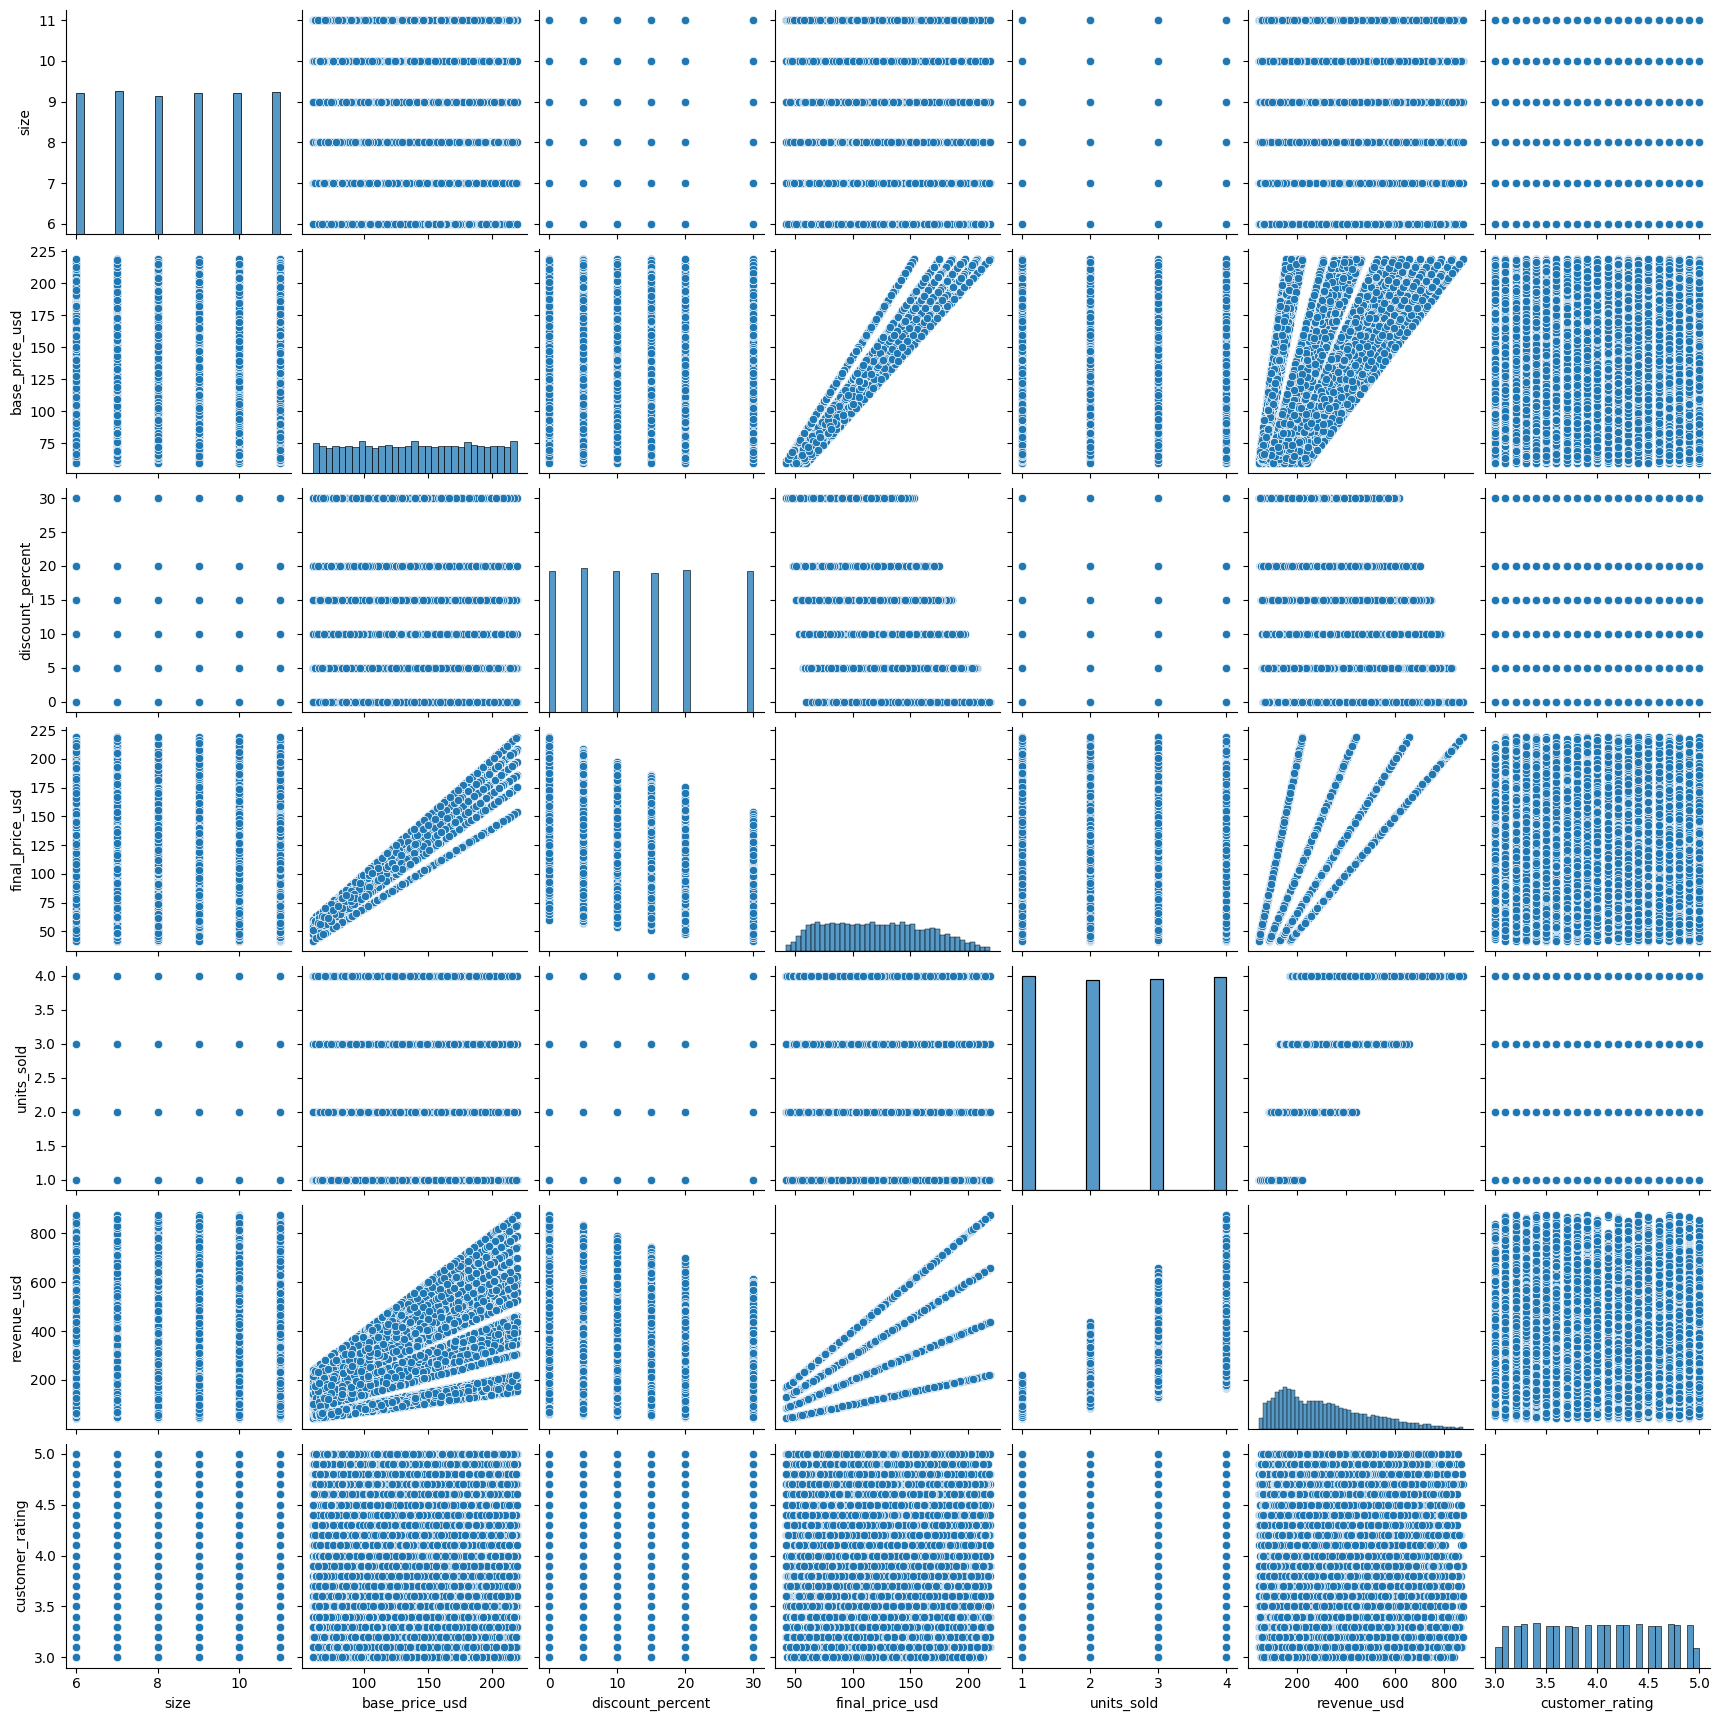

In [208]:
# make a pairplot using seaborn
sns.pairplot(df)

<Axes: >

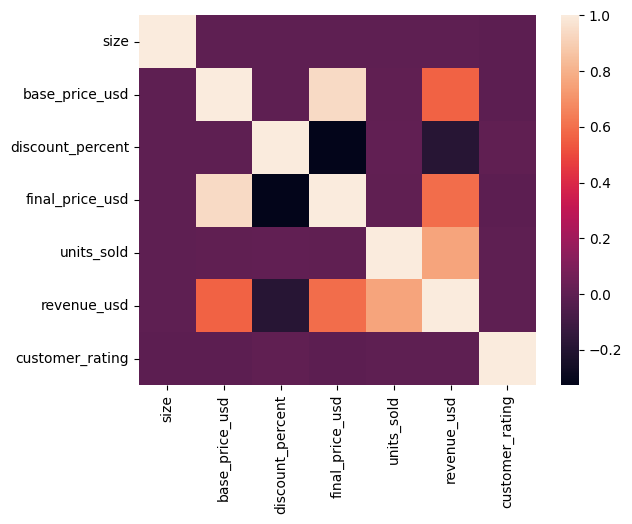

In [209]:
sns.heatmap(df.corr(numeric_only=True))

In [210]:
df.corr(numeric_only=True)

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
size,1.000000,-0.000702,-0.002299,-0.000096,-0.002659,-0.001093,-0.005961
base_price_usd,-0.000702,1.000000,-0.002360,0.940114,0.005353,0.562852,-0.005461
discount_percent,-0.002299,-0.002360,1.000000,-0.325977,0.005930,-0.187818,0.000662
final_price_usd,-0.000096,0.940114,-0.325977,1.000000,0.002479,0.595679,-0.005265
units_sold,-0.002659,0.005353,0.005930,0.002479,1.000000,0.759549,-0.001177
revenue_usd,-0.001093,0.562852,-0.187818,0.595679,0.759549,1.000000,-0.003710
customer_rating,-0.005961,-0.005461,0.000662,-0.005265,-0.001177,-0.003710,1.000000


In [212]:
df.groupby("units_sold")[df.columns].count()

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
units_sold,,,,,,,,,,,,,,,,,,
1,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556,7556
2,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430
3,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466,7466
4,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548
